In [8]:
import pandas as pd
import numpy as np

#导入pyplot模块
import matplotlib.pyplot as plt

#使用中文字体
from pylab import mpl
mpl.rcParams['font.sans-serif']="Simsun"
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

#设置缺省颜色和线型
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = (
    cycler(color=['steelblue', 'lightcoral', 'forestgreen', 'darkorange']) 
    + cycler(linestyle=['-', '--', '-.', ':']))


# 简介
**分类型变量**（Categorial Variable）的取值只用来区分不同的类别，不能用来进行数学计算。如“性别”，将男性编号为0，女性编号为1。假设A的性别为女（1），B的性别为男（0），不能说A和B的平均性别是0.5。

大多数分类型变量的取值之间没有顺序关系，例如性别，男和女之间显然不存在自然的顺序关系；有顺序关系的分类型变量称为**顺序型变量**。

对于字符串型的Series，pandas自动作为分类型处理。但当要处理的数据量较大时，将字符串型Series转换成分类型（category），可以显著节省后续处理的内存使用量，提高处理速度。

## 创建分类型变量

在构造Series时指定**dtype**参数为"category"，可以创建分类型Series。

In [9]:
s = pd.Series(["apple", "banana", "car", "apple"],dtype="category")
s

0     apple
1    banana
2       car
3     apple
dtype: category
Categories (3, object): ['apple', 'banana', 'car']

## 创建顺序型变量

用**Categorical**构造方法，指定**categories**和**ordered**参数，可以创建顺序型Categorical对象。用它可以创建顺序型Series。

In [10]:
cat = pd.Categorical(
    ["apple", "banana", "car", "apple"]
    , categories=["apple", "banana", "car"], ordered=True)
s = pd.Series(cat)
s

0     apple
1    banana
2       car
3     apple
dtype: category
Categories (3, object): ['apple' < 'banana' < 'car']

## 转换为分类型变量

**astype**方法将Series转换成分类型。



In [11]:
s = pd.Series(["apple", "banana", "car", "apple"])
s = s.astype("category")
s

0     apple
1    banana
2       car
3     apple
dtype: category
Categories (3, object): ['apple', 'banana', 'car']

# 查看信息

## 查看类别信息

对于分类型Series，可通过**cat属性**访问其类别信息

### 查看类别

In [12]:
s = pd.Series(["apple", "banana", "car", "apple"],dtype="category")
s.cat.categories

Index(['apple', 'banana', 'car'], dtype='object')

### 查看是否有顺序

In [13]:
s = pd.Series(["apple", "banana", "car", "apple"],dtype="category")
s.cat.ordered

False

### 以编码方式查看

In [36]:
s = pd.Series(["apple", "banana", "car", "apple"],dtype="category")
s.cat.codes

0    0
1    1
2    2
3    0
dtype: int8

## 查看各类别数量
对于分类型的列或Series，可使用**value_counts**查看各类别的数量。

In [14]:
df=pd.read_excel("scores.xlsx",index_col="学号")
df["班级"]=df["班级"].astype("category")
df["班级"].value_counts()

班级
信管19    30
电商19    27
Name: count, dtype: int64

### 可视化

我们可以用柱形图来可视化**value_counts**的结果

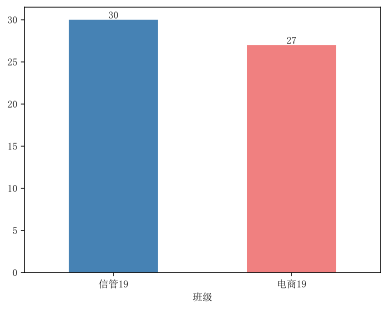

In [15]:
ax = df["班级"].value_counts().plot.bar(rot=0,color=['C0','C1'])

ax.bar_label(ax.containers[0])
plt.show()

### 多类别查看

如果参与计算的数据表中包含多列，则**value_counts**返回同时按照多个类别进行分类的计算结果。

In [16]:
df[["班级","性别"]].value_counts()

班级    性别
信管19  女     17
电商19  男     17
信管19  男     13
电商19  女     10
Name: count, dtype: int64

# 分类汇总（分组计算）

**groupby**可以创建分组对象，然后分组进行**mean**，**sum**等统计计算

In [17]:
df=pd.read_excel("scores.xlsx",index_col="学号")

df.head()

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语
学号,,,,,,,,
166241101,童绮琴,信管19,男,2001,天津,99,71,65
166241102,酆友容,信管19,女,2002,广西,81,64,52
166241103,端木孤菱,信管19,男,2002,湖南,67,90,98
166241104,闳芳苓,信管19,女,2002,湖北,89,100,90
166241105,温靖易,信管19,女,2002,吉林,80,70,77


## 分组统计计算

在对**groupby**对象进行统计计算时，应先筛选出需要计算的列。

In [18]:
groupby=df.groupby("班级")
means=groupby[["数学","语文","英语"]].mean()
means

,数学,语文,英语
班级,,,
信管19,77.033333,76.900000,73.766667
电商19,75.296296,73.925926,75.555556


## 可视化分组结果

分组计算的结果是DataFrame，可以使用之前介绍的方法绘制柱形图。
注意在绘制时可能需要**转置（.T）**

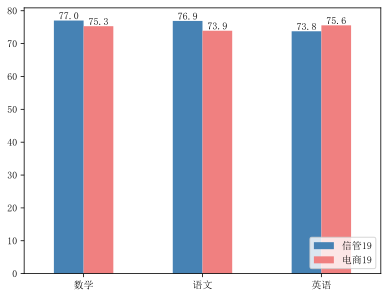

In [19]:
ax = means.T.plot.bar(rot=0)
for x in ax.containers:
    ax.bar_label(x, fmt="%.1f")
ax.legend(loc="lower right")
plt.show()

## 多列分类

**groupby**可以同时按照多列分类。

In [20]:
groupby=df.groupby(["班级","性别"])
means=groupby[["数学","语文","英语"]].mean()
means

数学         语文         英语
班级   性别                                 
信管19 女   76.588235  75.294118  75.588235
     男   77.615385  79.000000  71.384615
电商19 女   69.300000  72.800000  70.800000
     男   78.823529  74.588235  78.352941

## 同时计算多个统计量



In [21]:
groupby=df.groupby(["班级","性别"])
groupby[["数学","语文","英语"]].agg(["mean","std","median"])

数学                           语文                           英语   
              mean        std median       mean        std median       mean   
班级   性别                                                                        
信管19 女   76.588235  11.413034   78.0  75.294118  14.755358   70.0  75.588235  \
     男   77.615385  12.059149   81.0  79.000000  10.376255   83.0  71.384615   
电商19 女   69.300000   9.286190   69.5  72.800000  15.259241   68.5  70.800000   
     男   78.823529   9.748303   79.0  74.588235  15.087490   70.0  78.352941   

                           
               std median  
班级   性别                    
信管19 女   16.826537   76.0  
     男   14.186487   66.0  
电商19 女   13.431307   70.0  
     男   16.473240   81.0

In [22]:
groupby[["数学","语文","英语"]].agg(["mean","std","median"]).style.format(precision=1)

## 分类型变量编码

在使用统计分析、机器学习等方法对包含分类型变量的数据进行分析时，需要先对分类型变量进行编码，即用数字编码来代替分类值。

### one-hot编码

对于类别值数量多余2的因变量/自变量，应采用one-hot编码。

例如，变量“方向”可以有"东"/"南"/"西"/"北"四种不同的取值。采用one-hot编码，会将该变量拆分为4个0-1变量“方向-东”/“方向-男”/“方向-西”/“方向-北”。

pandas的get_dummies方法返回one-hot编码后的DataFrame/Series：
 * **columns**指定要编码的列

In [45]:
df=pd.read_excel("one-hot.xlsx")
df["方向"]=df["方向"].astype("category")
df

,人物,方向
0,张三,东
1,李四,东
2,王五,西
3,钱六,北
4,孙七,西
5,赵大,南


In [46]:
pd.get_dummies(df,columns=["方向"],dtype=np.int32)

,人物,方向_东,方向_北,方向_南,方向_西
0,张三,1,0,0,0
1,李四,1,0,0,0
2,王五,0,0,0,1
3,钱六,0,1,0,0
4,孙七,0,0,0,1
5,赵大,0,0,1,0


### 序数编码

直接使用**cat.codes**查看即可

In [47]:

df["方向"].cat.codes

0    0
1    0
2    3
3    1
4    3
5    2
dtype: int8